Uso de Python en Google Colab

Vamos a analizar un dataset de proteínas de E.coli donde veremos las funciones generales del paquete pandas, funciones generales de Python en sí, estadísticas y visualización de datos 🙂

**1)** Descargar el dataset de proteínas de E.coli: https://archive.ics.uci.edu/dataset/39/ecoli

Subir el archivo 'ecoli.data' aquí a Colab y abrirlo para ver que información tiene y como esta dispuesta y organizada.

**Como podemos observar dicho conjunto de datos no tiene los nombres de las columnas. Dicha información la podemos encontrar en el archivo 'ecoli.names'. Dichos nombres los vamos a cargar a mano haciendo una lista en python:**

In [ ]:
column_names = ['protein', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'site'] # Lista de nombres

Luego podemos observar que las columnas están separadas por 2 o más espacios en blanco. Por lo cual se va a utilizar '\s+' que representa uno o más caracteres de espacio en blanco como separador de las columnas.

Y como ya la primera fila del dataset son los datos, el argumento header debe ser None para que no los interprete como que son los nombres de las columnas.

**2)** Importación de librerías

In [ ]:
import pandas as pd   # Importación de la biblioteca pandas para poder usar sus funciones

La línea de código 'import pandas as pd' importa el módulo pandas y lo renombra como pd. pandas es una biblioteca de análisis de datos de alto rendimiento que proporciona estructuras de datos flexibles y eficientes, diseñadas para trabajar con datos tabulares y etiquetados.

Al importar pandas y asignarlo a pd, puedes acceder a todas las funcionalidades y objetos proporcionados por pandas utilizando el alias pd. Esto incluye estructuras de datos como DataFrame, así como funciones para leer y escribir datos en varios formatos, manipulación de datos, agregación, filtrado, análisis y visualización.

**3)** Ahora si comienza el análisis de datos!

In [ ]:
df = pd.read_csv("ecoli.data", header=None, sep='\s+', names=column_names) # leer el dataframe

In [ ]:
df # imprimir el dataframe en pantalla

,protein,mcg,gvh,lip,chg,aac,alm1,alm2,site
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [ ]:
# Guarda el DataFrame en un archivo .txt
df.to_csv('ecoli_data.txt', index=False)

In [ ]:
df.shape

(336, 9)

Dicha dataset tiene 336 entradas y 9 columnas. 8 de dichas columnas corresponden a los atributos y la última columna son las clases. Dichas clases corresponde a la localización celular donde se encuentran dichas proteínas en E.coli.

In [ ]:
type(df) # Para saber que tipo de objeto es la variable 'df'

pandas.core.frame.DataFrame

Esto indica que df es un objeto de tipo DataFrame de pandas.

In [ ]:
df.dtypes # Para saber los tipos de datos de cada columna del DataFrame:

protein     object
mcg        float64
gvh        float64
lip        float64
chg        float64
aac        float64
alm1       float64
alm2       float64
site        object
dtype: object

object: significa que es un objeto (texto) osea una cadena de caracteres (string)

float: significa que es un número con coma

Para saber las diferentes clases que contiene dicho conjunto de datos se puede hacer de la siguiente manera:

In [ ]:
clases_unicas = df['site'].unique()  # quienes son
print(clases_unicas)

['cp' 'im' 'imS' 'imL' 'imU' 'om' 'omL' 'pp']


In [ ]:
num_clases = df['site'].nunique() # cuantas son
print(num_clases)

8


In [ ]:
df.head() # con la función head veo las primeras 5 líneas de mi dataframe

,protein,mcg,gvh,lip,chg,aac,alm1,alm2,site
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [ ]:
df.tail() # con la función tail veo las últimas 5 líneas de mi dataframe

,protein,mcg,gvh,lip,chg,aac,alm1,alm2,site
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp
335,YTFQ_ECOLI,0.74,0.74,0.48,0.5,0.31,0.53,0.52,pp


In [ ]:
df.head(216)

,protein,mcg,gvh,lip,chg,aac,alm1,alm2,site
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
211,YCEE_ECOLI,0.52,0.54,0.48,0.5,0.62,0.76,0.79,im
212,EXBD_ECOLI,0.46,0.59,0.48,0.5,0.36,0.76,0.23,im
213,FTSL_ECOLI,0.36,0.45,0.48,0.5,0.38,0.79,0.17,im
214,FTSN_ECOLI,0.00,0.51,0.48,0.5,0.35,0.67,0.44,im


In [ ]:
# para ver las líneas comprendidas entre las observaciones 200 y 215 puedo hacer así:

df.head(216).tail(16)

#uso PIPE(tuberia):la salida de un resultado, entra en otra función.
#hay que ponerlo así ya que los índices en python arrancan del número 0.

,protein,mcg,gvh,lip,chg,aac,alm1,alm2,site
200,PTGB_ECOLI,0.58,0.55,0.48,0.5,0.57,0.70,0.74,im
201,PTHB_ECOLI,0.36,0.47,0.48,0.5,0.51,0.69,0.72,im
202,PTMA_ECOLI,0.39,0.41,0.48,0.5,0.52,0.72,0.75,im
203,PTOA_ECOLI,0.35,0.51,0.48,0.5,0.61,0.71,0.74,im
204,PTTB_ECOLI,0.31,0.44,0.48,0.5,0.50,0.79,0.82,im
205,RODA_ECOLI,0.61,0.66,0.48,0.5,0.46,0.87,0.88,im
206,SECE_ECOLI,0.48,0.49,0.48,0.5,0.52,0.77,0.71,im
207,SECF_ECOLI,0.11,0.50,0.48,0.5,0.58,0.72,0.68,im
208,SECY_ECOLI,0.31,0.36,0.48,0.5,0.58,0.94,0.94,im
209,TNAB_ECOLI,0.68,0.51,0.48,0.5,0.71,0.75,0.78,im


In [ ]:
df['protein'].head()  #selecciono una columna

0     AAT_ECOLI
1    ACEA_ECOLI
2    ACEK_ECOLI
3    ACKA_ECOLI
4     ADI_ECOLI
Name: protein, dtype: object

In [ ]:
df.protein.head() #otra forma de hacer lo mismo

0     AAT_ECOLI
1    ACEA_ECOLI
2    ACEK_ECOLI
3    ACKA_ECOLI
4     ADI_ECOLI
Name: protein, dtype: object

In [ ]:
df.describe() # para obtener estadísticas básicas de los valores numéricos del dataset

,mcg,gvh,lip,chg,aac,alm1,alm2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [ ]:
df['alm1'].min() #para ver específicamente el valor mínimo de la columna 'alm1'

0.03

In [ ]:
df['alm2'].max() #para ver específicamente el valor máximoo de la columna 'alm2'

0.99

In [ ]:
# Datos agrupados por sitios

data_agrupada = df.groupby('site')

In [ ]:
data_agrupada.describe() # Estadísticas para todas las columnas numéricas agrupadas por sitio

mcg                                                           gvh  \
      count      mean       std   min     25%    50%     75%   max  count   
site                                                                        
cp    143.0  0.363566  0.123826  0.00  0.2700  0.360  0.4400  0.67  143.0   
im     77.0  0.478442  0.194511  0.00  0.3400  0.490  0.6300  0.89   77.0   
imL     2.0  0.725000  0.035355  0.70  0.7125  0.725  0.7375  0.75    2.0   
imS     2.0  0.740000  0.155563  0.63  0.6850  0.740  0.7950  0.85    2.0   
imU    35.0  0.726000  0.108552  0.47  0.6400  0.760  0.8100  0.88   35.0   
om     20.0  0.672500  0.069424  0.52  0.6300  0.675  0.7325  0.78   20.0   
omL     5.0  0.698000  0.044385  0.66  0.6700  0.680  0.7100  0.77    5.0   
pp     52.0  0.652115  0.090344  0.29  0.6300  0.670  0.7000  0.76   52.0   

                ...    alm1         alm2                                    \
          mean  ...     75%   max  count      mean       std   min     25%   
site            ...                                                          
cp    0.409720  ...  0.3700  0.55  143.0  0.395245  0.096062  0.00  0.3500   
im    0.496623  ...  0.8200  1.00   77.0  0.730390  0.166682  0.17  0.6900   
imL   0.470000  ...  0.7325  0.82    2.0  0.570000  0.381838  0.30  0.4350   
imS   0.510000  ...  0.7000  0.76    2.0  0.570000  0.311127  0.35  0.4600   
imU   0.458857  ...  0.7800  0.92   35.0  0.748000  0.095542  0.33  0.7200   
om    0.710000  ...  0.5400  0.59   20.0  0.305500  0.083884  0.15  0.2675   
omL   0.512000  ...  0.5800  0.59    5.0  0.222000  0.138996  0.01  0.1600   
pp    0.699808  ...  0.5125  0.84   52.0  0.374423  0.118262  0.19  0.3075   

                           
        50%     75%   max  
site                       
cp    0.400  0.4400  0.61  
im    0.780  0.8200  0.99  
imL   0.570  0.7050  0.84  
imS   0.570  0.6800  0.79  
imU   0.760  0.7900  0.90  
om    0.290  0.3375  0.52  
omL   0.280  0.3000  0.36  
pp    0.375  0.4225  0.85  

[8 rows x 56 columns]

In [ ]:
data_agrupada.count()

,protein,mcg,gvh,lip,chg,aac,alm1,alm2
site,,,,,,,,
cp,143,143,143,143,143,143,143,143
im,77,77,77,77,77,77,77,77
imL,2,2,2,2,2,2,2,2
imS,2,2,2,2,2,2,2,2
imU,35,35,35,35,35,35,35,35
om,20,20,20,20,20,20,20,20
omL,5,5,5,5,5,5,5,5
pp,52,52,52,52,52,52,52,52


In [ ]:
data_agrupada.protein.count() # para ver solamente la columna de proteinas y me las cuente
# agrupadas por sitios

site
cp     143
im      77
imL      2
imS      2
imU     35
om      20
omL      5
pp      52
Name: protein, dtype: int64

In [ ]:
data_agrupada.protein.count().sort_values(ascending=False) # ordeno de > a <

site
cp     143
im      77
pp      52
imU     35
om      20
omL      5
imL      2
imS      2
Name: protein, dtype: int64

In [ ]:
# Puedo observar como es la distribución de las proteínas en los distintas localizaciones
# posibles de la bacteria e.coli ordenadas en forma descendente
# Puedo pedir especificamente la cantidad de proteínas que tiene un sitio determinado:
# Como por ejemplo la cantidad de proteínas citoplasmáticas de la bacteria.

data_agrupada.site.count()['cp']

143

In [ ]:

site_protein = df.groupby(['site','protein']) # AGRUPO 2 COLUMNAS
site_protein.count().head()

# de esta manera puedo ver las proteínas que se encuentran en cada sitio

mcg  gvh  lip  chg  aac  alm1  alm2
site protein                                        
cp   AAT_ECOLI     1    1    1    1    1     1     1
     ACEA_ECOLI    1    1    1    1    1     1     1
     ACEK_ECOLI    1    1    1    1    1     1     1
     ACKA_ECOLI    1    1    1    1    1     1     1
     ADI_ECOLI     1    1    1    1    1     1     1

In [ ]:
localization = data_agrupada.protein.count()

**4)** Vizualización de datos en python

In [ ]:
import matplotlib.pyplot as plt

Dicha línea importa el módulo pyplot de la biblioteca matplotlib y lo renombra como plt. pyplot es una interfaz gráfica que proporciona una colección de funciones para crear y personalizar gráficos.

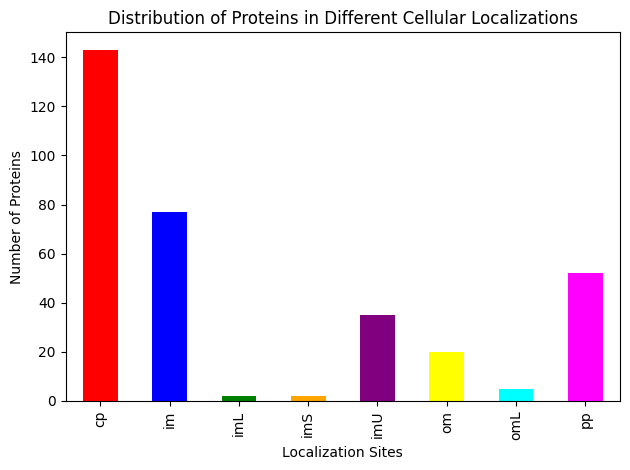

In [ ]:
# Lista de colores para las barras
colores = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta']

# Crear la gráfica de barras
grafica = localization.plot(kind='bar', title='Proteins Localization Sites', color=colores)

# Personalizar los ejes x e y
grafica.set_xlabel('Localization Sites')
grafica.set_ylabel('Number of Proteins')

# Añadir título y ajustar los márgenes
plt.title('Distribution of Proteins in Different Cellular Localizations')
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [ ]:
localization_ord = data_agrupada.protein.count().sort_values(ascending=False)

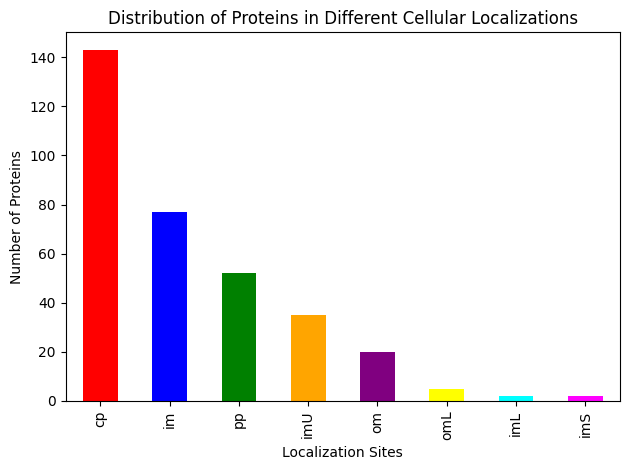

In [ ]:
# Lista de colores para las barras
colores = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta']

# Crear la gráfica de barras
grafica = localization_ord.plot(kind='bar', title='Proteins Localization Sites', color=colores)

# Personalizar los ejes x e y
grafica.set_xlabel('Localization Sites')
grafica.set_ylabel('Number of Proteins')

# Añadir título y ajustar los márgenes
plt.title('Distribution of Proteins in Different Cellular Localizations')
plt.tight_layout()

# Mostrar la gráfica
plt.show()